These data were taken with the stage temperature regulating at about 570 mK.

In [1]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300

In [2]:
from collections import defaultdict

In [3]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis.resonator import lmfit_models, lmfit_resonator

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2017-02-15_182325_centered.npd/')

In [5]:
swp_list = [npd.read(name) for name in npd.node_names()[:9] if name.startswith('SingleSweep') and not 'Stream' in name]
sss_list = [npd.read(name) for name in npd.node_names()[:9] if name.startswith('SingleSweepStream')]

In [6]:
swp_dict = defaultdict(list)
sss_dict = defaultdict(list)
for swp, sss in zip(swp_list, sss_list):
    swp_dict[sss.state.lo_index].append(swp)
    sss_dict[sss.state.lo_index].append(sss)

# Functions

In [7]:
res = swp_list[0].resonator

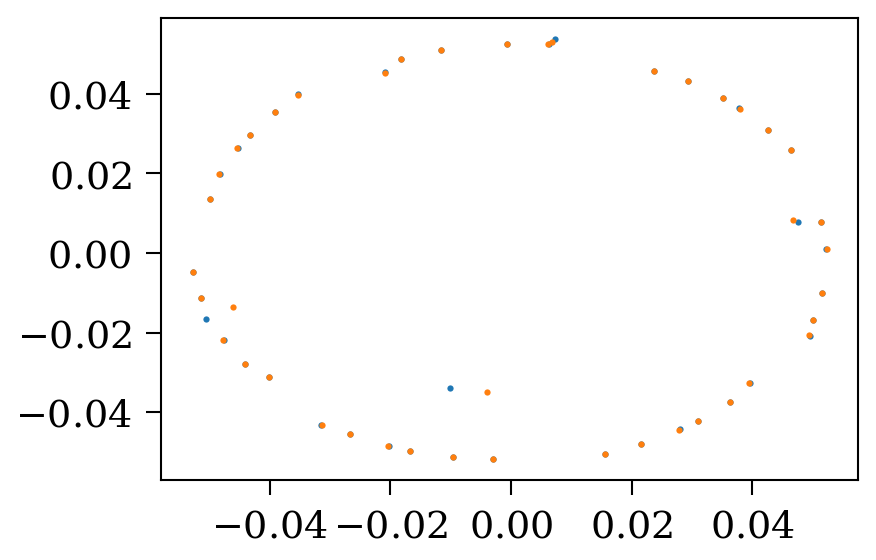

In [8]:
fig, ax = plt.subplots()
ax.plot(res.s21.real, res.s21.imag, '.')
ax.plot(res.current_result.init_fit.real, res.current_result.init_fit.imag, '.')

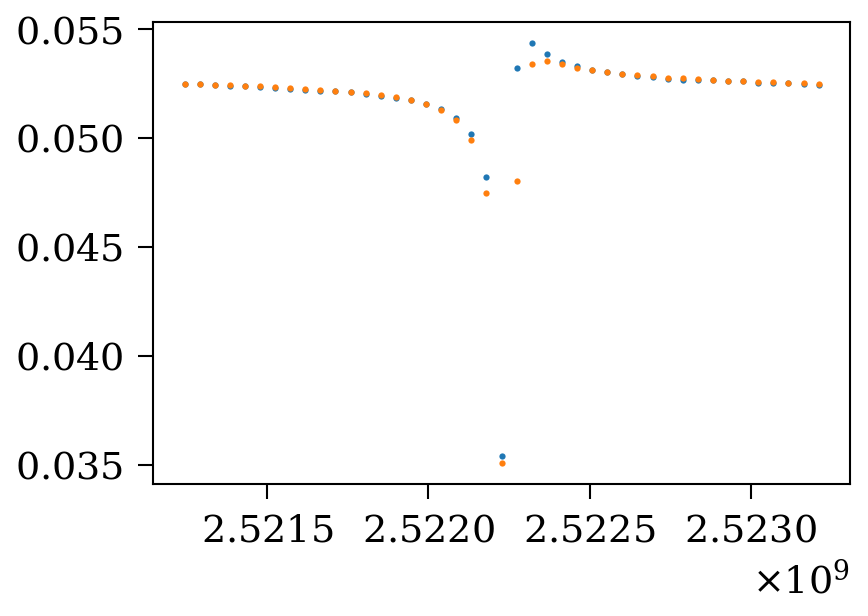

In [9]:
fig, ax = plt.subplots()
ax.plot(res.frequency, np.abs(res.s21), '.')
ax.plot(res.frequency, np.abs(res.current_result.init_fit), '.')
#ax.plot(res.frequency, np.abs(res.current_result.best_fit), '.')

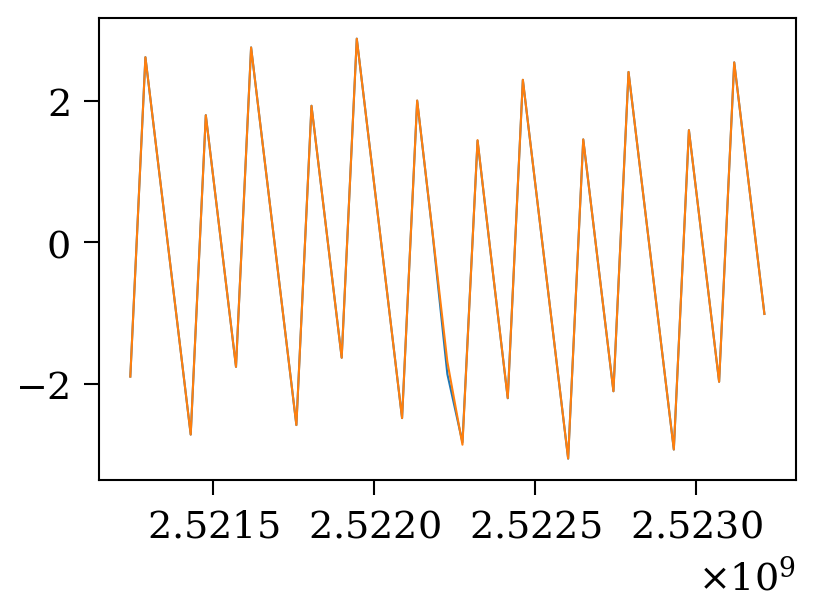

In [10]:
fig, ax = plt.subplots()
ax.plot(res.frequency, np.angle(res.s21), '-')
ax.plot(res.frequency, np.angle(res.current_result.init_fit), '-')

In [11]:
res.current_result.init_params

Parameters([('delay',
             <Parameter 'delay', 6.0257300471993916e-06, bounds=[-inf:inf]>),
            ('phi',
             <Parameter 'phi', -1.882667439359383, bounds=[-3.141592653589793:3.141592653589793]>),
            ('f_min',
             <Parameter 'f_min', value=2521242500.0 (fixed), bounds=[-inf:inf]>),
            ('A_mag',
             <Parameter 'A_mag', 0.052708577650391941, bounds=[0:inf]>),
            ('A_slope',
             <Parameter 'A_slope', -4.3882106531595482e-09, bounds=[-inf:inf]>),
            ('f_0',
             <Parameter 'f_0', 2522249155.9734497, bounds=[2521242500.0:2523211250.0]>),
            ('Q',
             <Parameter 'Q', 53807.506537121677, bounds=[128.11311111111112:53807.506666666668]>),
            ('Q_e_real',
             <Parameter 'Q_e_real', 96083.704921427401, bounds=[1:10000000.0]>),
            ('Q_e_imag',
             <Parameter 'Q_e_imag', 34452.488235455006, bounds=[-10000000.0:10000000.0]>)])

# Resonator model

In [12]:
for swp in swp_list:
    swp.fit_resonator(model=lmfit_resonator.LinearLossResonatorWithCable)
for sss in sss_list:
    sss.sweep.fit_resonator(model=lmfit_resonator.LinearLossResonatorWithCable)

In [28]:
res = sss_list[0].resonator

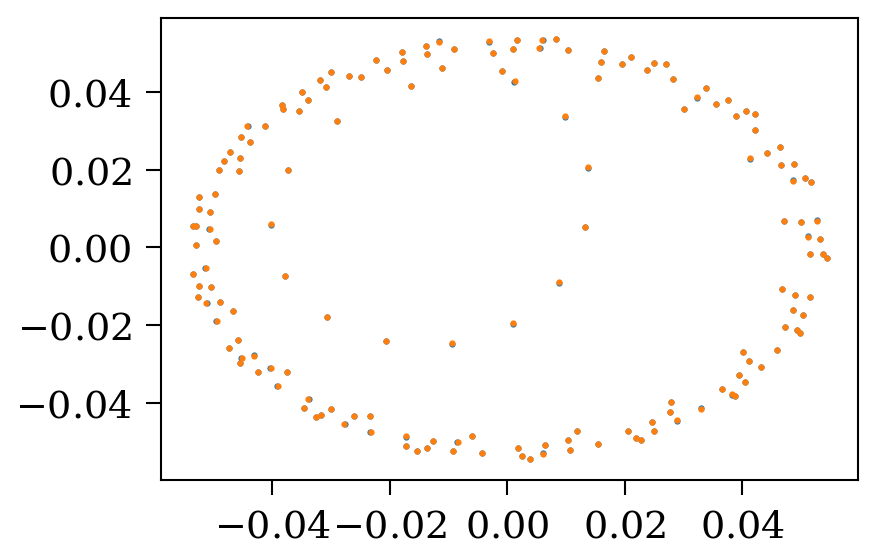

In [29]:
fig, ax = plt.subplots()
ax.plot(res.s21.real, res.s21.imag, '.')
ax.plot(res.current_result.init_fit.real, res.current_result.init_fit.imag, '.')

# Tone centering

In [16]:
print([sss.stream.tone_offset_frequency() for sss in sss_list])

[array([ 0.]), array([ 0.]), array([ 0.])]


# Forward scattering versus frequency

In [21]:
f_label = 'frequency / MHz'
s21_label = '$|S_{21}|^2$ / dB'
ic_title = r'$Q_i = {:.0f}, \; Q_c = {:.0f}$'

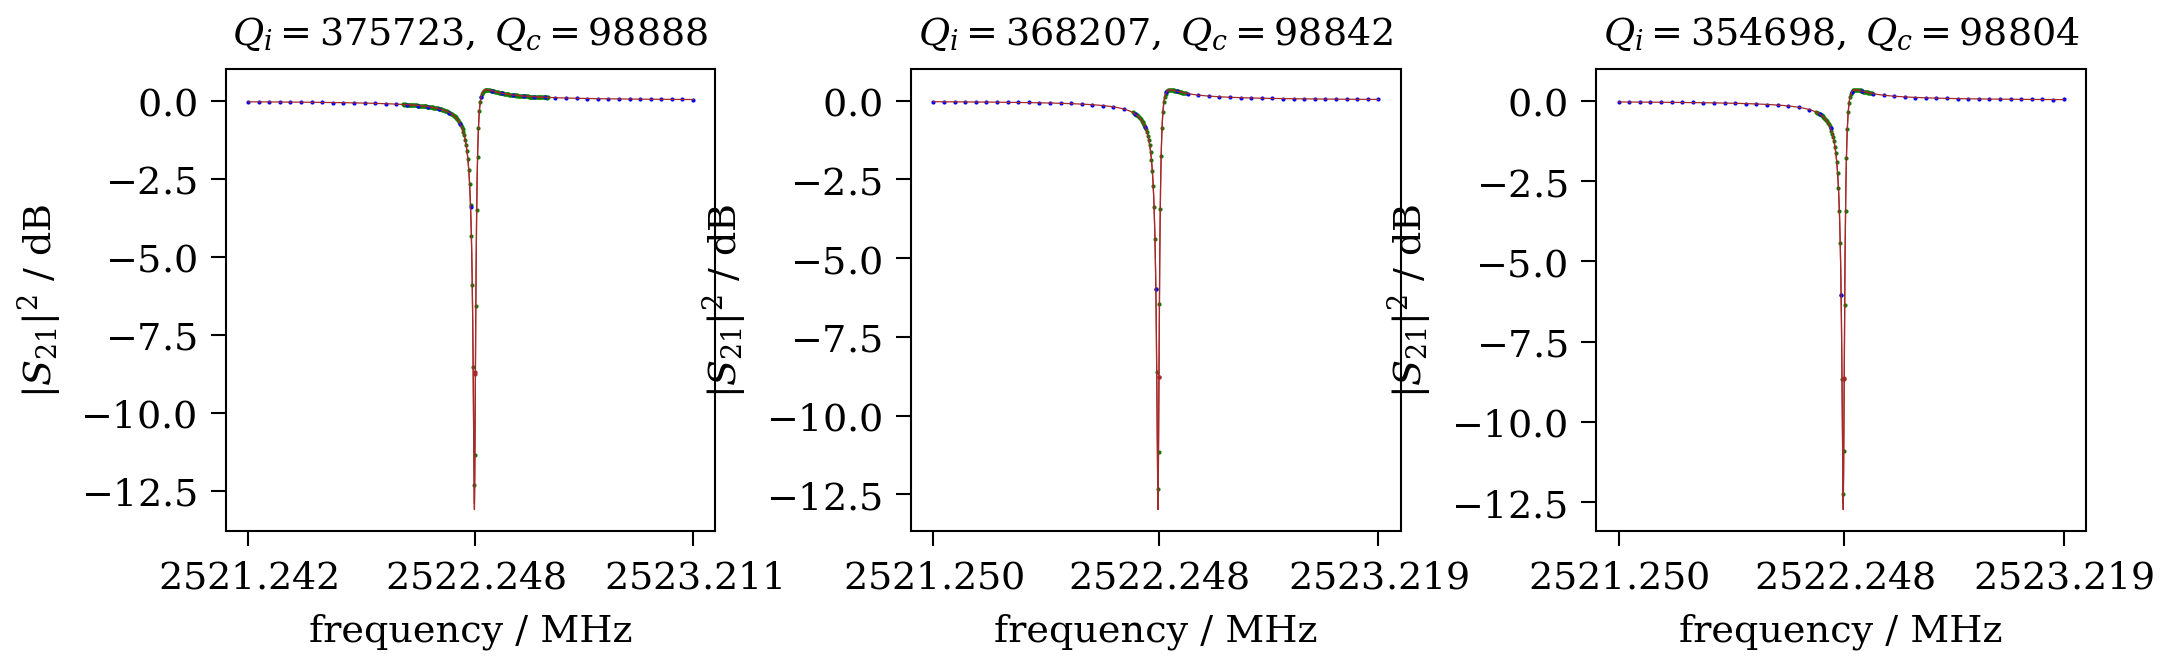

In [22]:
channel = 0
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for swp, sss, ax in zip(swp_dict[channel], sss_dict[channel], axes.flatten()):
    ax.set_xlabel(f_label)
    ax.set_ylabel(s21_label)
    plot_basic.resonator_amplitude(sss.resonator, ax, normalize=True, sweep_mean_settings={'color': 'green'})
    plot_basic.resonator_amplitude(swp.resonator, ax, normalize=True)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

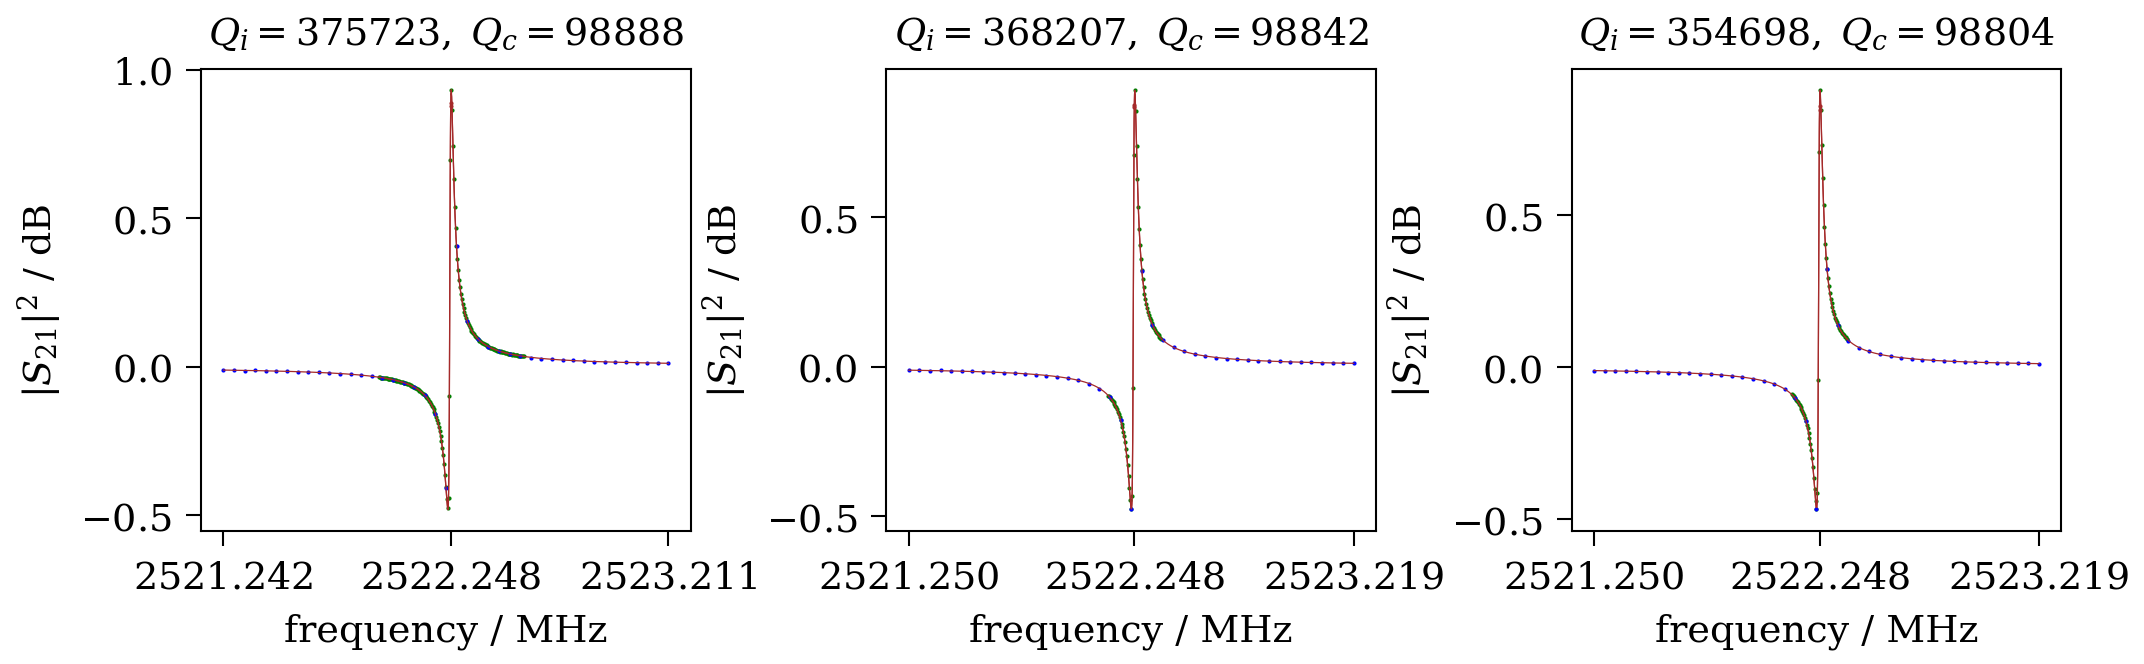

In [23]:
channel = 0
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for swp, sss, ax in zip(swp_dict[channel], sss_dict[channel], axes.flatten()):
    ax.set_xlabel(f_label)
    ax.set_ylabel(s21_label)
    plot_basic.resonator_phase(sss.resonator, ax, normalize=True, sweep_mean_settings={'color': 'green'})
    plot_basic.resonator_phase(swp.resonator, ax, normalize=True)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

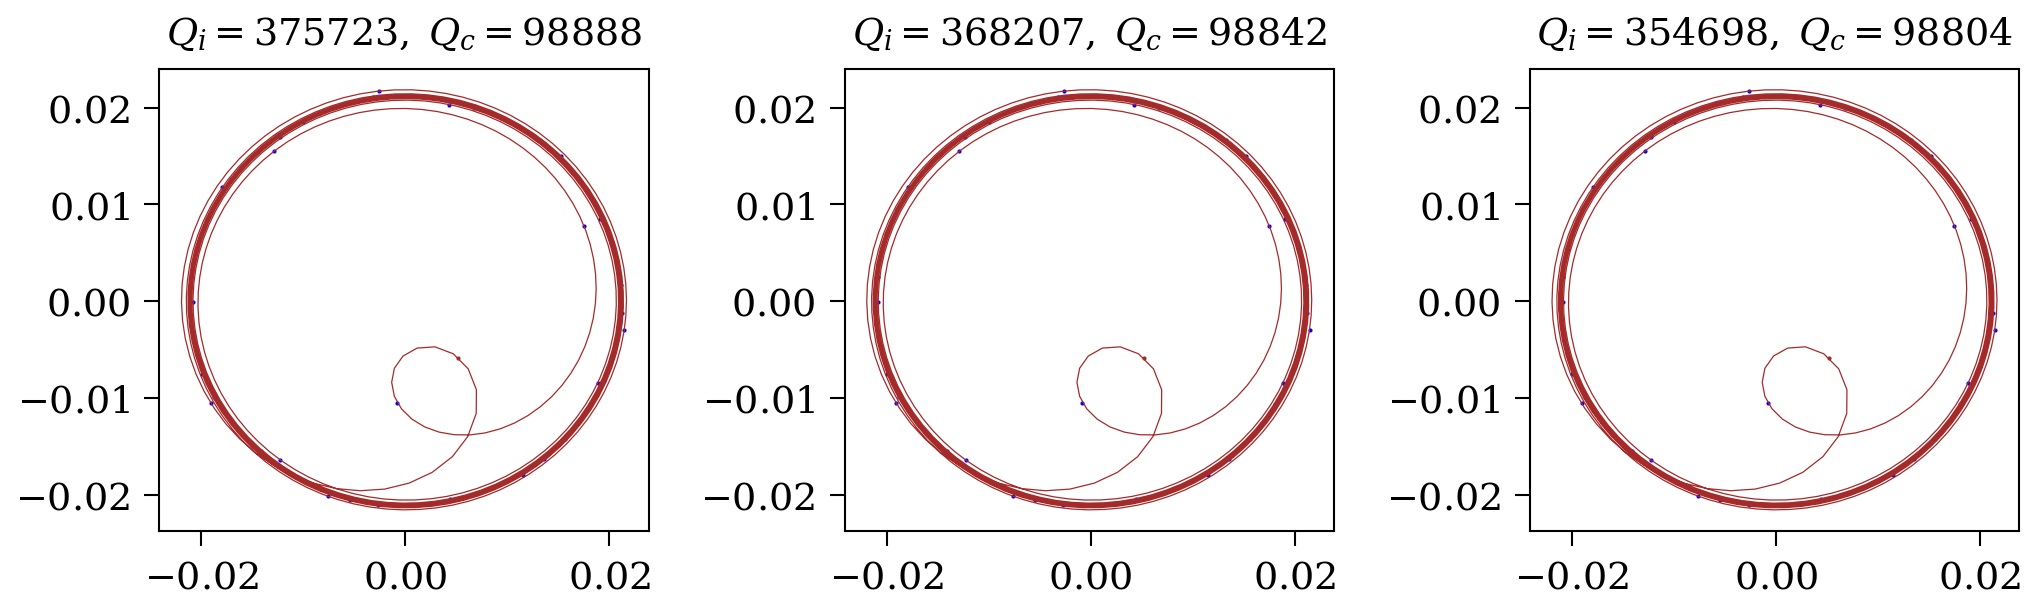

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(8, 2), gridspec_kw={'wspace': 0.4})
for sss, ax in zip(sss_list, axes.flatten()):
    plot_basic.resonator_complex_plane(swp.resonator, ax, normalize=False)
    ax.set_title(ic_title.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

In [32]:
for swp, sss in zip(swp_list, sss_list):
    print("Sweep: loss_i = {:.3g} +/- {:.1g}".format(swp.resonator.loss_i, swp.resonator.loss_i_error))
    print("SSS: loss_i = {:.3g} +/- {:.1g}".format(sss.resonator.loss_i, sss.resonator.loss_i_error))
    print("Sweep: x_error = {:.1g}".format(swp.resonator.f_0_error / swp.resonator.f_0))
    print("SSS: x_error = {:.1g}".format(sss.resonator.f_0_error / sss.resonator.f_0))
    print('----')
    

Sweep: loss_i = 2.74e-06 +/- 1e-07
SSS: loss_i = 2.66e-06 +/- 3e-08
Sweep: x_error = 7e-08
SSS: x_error = 2e-08
----
Sweep: loss_i = 2.75e-06 +/- 4e-08
SSS: loss_i = 2.72e-06 +/- 1e-08
Sweep: x_error = 3e-08
SSS: x_error = 9e-09
----
Sweep: loss_i = 2.89e-06 +/- 3e-08
SSS: loss_i = 2.82e-06 +/- 5e-09
Sweep: x_error = 2e-08
SSS: x_error = 5e-09
----


In [27]:
for swp, sss in zip(swp_list, sss_list):
    print("Sweep: redchi = {:.0f}".format(swp.resonator.current_result.redchi))
    print("SSS: redchi = {:.0f}".format(sss.resonator.current_result.redchi))
    print('----')

Sweep: redchi = 2752
SSS: redchi = 1901
----
Sweep: redchi = 294
SSS: redchi = 95
----
Sweep: redchi = 39
SSS: redchi = 33
----
